In [1]:
from keras.layers import Input, Dense, Conv1D, Flatten, MaxPooling1D
from keras.models import Model, Sequential

def network(size):
    model = Sequential()
    model.add(Conv1D(128, (8,), activation='relu', padding='valid', input_shape=(size, 1)))
    model.add(MaxPooling1D((2,), padding='same'))
    
    model.add(Conv1D(64, (8,), activation='relu', padding='valid'))
    model.add(MaxPooling1D((2,), padding='same'))
    
    model.add(Conv1D(32, (8,), activation='relu', padding='valid'))
    model.add(MaxPooling1D((2,), padding='same'))
    
    model.add(Flatten())
    model.add(Dense(size, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'categorical_accuracy'])

    return model

Using TensorFlow backend.


In [5]:
import os
import h5py
import numpy as np

size = 60

base_path = '/home/irene/Documents/Datos-Tesis/Training_'

total_files = len(os.listdir(base_path))
x_dataset = np.zeros(shape=(0, size))
y_dataset = np.zeros(shape=(0, size))

for file_path in os.listdir(base_path):
    current_index = 0
    h5f = h5py.File(os.path.join(base_path, file_path), 'r')
    print("{}".format(os.path.join(base_path, file_path)))
    while current_index < len(h5f['normal'][:]):
        if current_index + size > len(h5f['normal'][:]):
            difference = len(h5f['normal'][:]) - current_index
            x = h5f['normal'][current_index:current_index+difference]
            y = h5f['transformed'][current_index:current_index+difference]
            difference2 = size - difference
            x = np.append(x, np.zeros(difference2))
            y = np.append(y, np.zeros(difference2))
        
        else:
            x = h5f['normal'][current_index:current_index+size]
            y = h5f['transformed'][current_index:current_index+size]
        if 1 in y:
            x_dataset = np.vstack((x_dataset, x))
            y_dataset = np.vstack((y_dataset, y))
        
        current_index = current_index + 1
    break

x_dataset = np.reshape(x_dataset, (len(x_dataset), size, 1))
y_dataset = np.reshape(y_dataset, (len(y_dataset), size))

num_to_load = len(x_dataset)
split = int(num_to_load * 0.85)

x_train = x_dataset[0:split]
y_train = y_dataset[0:split]
x_test = x_dataset[split:]
y_test = y_dataset[split:]
    
# classifier.save_weights('/home/irene/Documents/Datos-Tesis/weights.h5')

/home/irene/Documents/Datos-Tesis/Training/training_data_28


In [6]:

classifier = network(size)
classifier.fit(x_train, y_train, epochs=20, batch_size=64)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
51/51 [==============================] - 0s 8ms/step - loss: 15.8021 - acc: 0.0196 - categorical_accuracy: 0.0196
Epoch 2/20
51/51 [==============================] - 0s 587us/step - loss: 15.8021 - acc: 0.0196 - categorical_accuracy: 0.0196
Epoch 3/20
51/51 [==============================] - 0s 520us/step - loss: 15.8021 - acc: 0.0196 - categorical_accuracy: 0.0196
Epoch 4/20
51/51 [==============================] - 0s 515us/step - loss: 15.8021 - acc: 0.0196 - categorical_accuracy: 0.0196
Epoch 5/20
51/51 [==============================] - 0s 528us/step - loss: 15.8021 - acc: 0.0196 - categorical_accuracy: 0.0196
Epoch 6/20
51/51 [==============================] - 0s 556us/step - loss: 15.8021 - acc: 0.0196 - categorical_accuracy: 0.0196
Epoch 7/20
51/51 [==============================] - 0s 512us/step - loss: 15.8021 - acc: 0.0196 - categorical_accuracy: 0.0196
Epoch 8/20
51/51 [==============================] - 0s 593us/step

In [3]:
network(60).summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 53, 128)           1152      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 27, 128)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 20, 64)            65600     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 10, 64)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 3, 32)             16416     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 2, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
__________

In [72]:
from keras.layers import Input, Dense, Conv1D, Flatten, MaxPooling1D
from keras.models import Model, Sequential

def network(input_window_size=60, filter_number=32, conv_window=(3,), pooling_window=(2,), activation='relu', 
            dense_activation='softmax', optimizer='adam', loss='categorical_crossentropy', layers=1):
    model = Sequential()
    
    # Input Layer
    model.add(Conv1D(filter_number, conv_window, activation=activation, padding='valid', input_shape=(input_window_size, 1)))
    model.add(MaxPooling1D(pooling_window, padding='same'))
    
    # Hidden Layers
    filter_number_temp = filter_number
    for i in range(layers):
        filter_number_temp = filter_number_temp *  2
        model.add(Conv1D(filter_number_temp, conv_window, activation=activation, padding='valid'))
        model.add(MaxPooling1D(pooling_window, padding='same'))
    
    # Output Layer
    model.add(Flatten())
    model.add(Dense(2, activation=dense_activation))

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy', 'categorical_accuracy'])

    return model

In [143]:
import os
import h5py
import numpy as np
from keras.utils import to_categorical

size = 60

base_path = '/home/irene/Documents/Datos-Tesis/Training_window'

total_files = len(os.listdir(base_path))
x_dataset = np.zeros(shape=(0, size))
y_dataset = np.zeros(shape=(0, 1))
count = 1
skipped = []
for file_path in os.listdir(base_path):
    current_index = 0
    print(count)
    count = count + 1
    if random < 0.15:
        skipped.append(os.path.join(base_path, file_path))
        continue
        h5f = h5py.File(os.path.join(base_path, file_path), 'r')
    
    while current_index < len(h5f['normal'][:]):
        if current_index + size > len(h5f['normal'][:]):
            difference = len(h5f['normal'][:]) - current_index
            x = h5f['normal'][current_index:current_index+difference]
            y = h5f['transformed'][current_index:current_index+difference]
            difference2 = size - difference
            x = np.append(x, np.zeros(difference2))
            y = [np.amax(y)]
        else:
            x = h5f['normal'][current_index:current_index+size]
            y = h5f['transformed'][current_index:current_index+size]
            y = [np.amax(y)]

        x_dataset = np.vstack((x_dataset, x))
        y_dataset = np.vstack((y_dataset, y))
        
        current_index = current_index + 1

x_dataset = np.reshape(x_dataset, (len(x_dataset), size, 1))
y_dataset = np.reshape(y_dataset, (len(y_dataset), 1))
y_dataset = to_categorical(y_dataset)

num_to_load = len(x_dataset)
split = int(num_to_load * 0.85)

x_train = x_dataset[0:split]
y_train = y_dataset[0:split]
x_test = x_dataset[split:]
y_test = y_dataset[split:]
    
# classifier.save_weights('/home/irene/Documents/Datos-Tesis/weights.h5')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76


KeyboardInterrupt: 

In [73]:
cnn = network(layers=2)

In [142]:
cnn.fit(x_train, y_train, epochs=60, batch_size=32)

Epoch 1/80
82532/82532 [==============================] - 21s 251us/step - loss: 0.0581 - acc: 0.9793 - categorical_accuracy: 0.9793
Epoch 2/80
82532/82532 [==============================] - 21s 252us/step - loss: 0.0544 - acc: 0.9811 - categorical_accuracy: 0.9811
Epoch 3/80
82532/82532 [==============================] - 19s 230us/step - loss: 0.0529 - acc: 0.9810 - categorical_accuracy: 0.9810
Epoch 4/80
82532/82532 [==============================] - 19s 229us/step - loss: 0.0493 - acc: 0.9821 - categorical_accuracy: 0.9821
Epoch 5/80
82532/82532 [==============================] - 22s 272us/step - loss: 0.0483 - acc: 0.9832 - categorical_accuracy: 0.9832
Epoch 6/80
82532/82532 [==============================] - 24s 287us/step - loss: 0.0438 - acc: 0.9847 - categorical_accuracy: 0.9847
Epoch 7/80
82532/82532 [==============================] - 22s 262us/step - loss: 0.0425 - acc: 0.9849 - categorical_accuracy: 0.9849
Epoch 8/80
82532/82532 [==============================] - 23s 275us/s

In [25]:
test = np.reshape(x_train[0:100], (len(x_train[0:100]), 60, 1))


[x[1] for x in cnn.predict(test)]

[0.08930241,
 0.061083462,
 0.06512754,
 0.07934572,
 0.07686524,
 0.045783937,
 0.061086465,
 0.13617136,
 0.20177619,
 0.22235863,
 0.14132403,
 0.06219078,
 0.09928144,
 0.14022745,
 0.18018983,
 0.21087098,
 0.12856553,
 0.3047009,
 0.48970455,
 0.43872887,
 0.26132843,
 0.23718484,
 0.35855338,
 0.39988908,
 0.25129542,
 0.17558765,
 0.21118222,
 0.22424649,
 0.22884478,
 0.14240466,
 0.063991025,
 0.062215444,
 0.07119801,
 0.09277696,
 0.086751595,
 0.08175558,
 0.08978126,
 0.11500022,
 0.13534124,
 0.09840687,
 0.09615819,
 0.09359415,
 0.11746682,
 0.1755925,
 0.16706069,
 0.16603717,
 0.1702081,
 0.15985386,
 0.177189,
 0.14796974,
 0.3517113,
 0.32134882,
 0.1928672,
 0.098692015,
 0.06992751,
 0.077690944,
 0.07979451,
 0.044417202,
 0.031480458,
 0.026336467,
 0.05299853,
 0.06385292,
 0.03622871,
 0.03154725,
 0.03174737,
 0.034744397,
 0.033262424,
 0.030533077,
 0.05149208,
 0.06188948,
 0.06074236,
 0.10969246,
 0.06698955,
 0.06188907,
 0.08913668,
 0.03628293,
 0.07

In [27]:
cnn.predict_classes(test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
tr = read('/home/irene/Documents/Datos-Tesis/Estaciones/PEZE.HHZ.2018.337.16.57.18.sac')[0]


NameError: name 'read' is not defined

In [145]:
import numpy as np 
import matplotlib.pyplot as plt
from obspy.core import read, UTCDateTime
from obspy.io.sac.util import get_sac_reftime
from obspy.signal.filter import lowpass, bandpass, highpass


tr = read('/home/irene/Documents/Datos-Tesis/Estaciones/BATAN.HHZ.2018.337.16.57.18.sac')[0]

tr.filter('bandpass', freqmin=1.0, freqmax=10.0, corners=4, zerophase=True)
tr.normalize()
# picker_p = int(tr.stats.sac.a * tr.stats.sampling_rate)

data = tr.data

In [146]:
size = 60
input_dataset = np.zeros(shape=(0, size))
current_index = 0

while current_index < len(data):
    if current_index + size > len(data):
        difference = len(data) - current_index
        x = data[current_index:current_index+difference]
        difference2 = size - difference
        x = np.append(x, np.zeros(difference2))
    else:
        x = data[current_index:current_index+size]

    input_dataset = np.vstack((input_dataset, x))

    current_index = current_index + 1

In [147]:
input_dataset = np.reshape(input_dataset, (len(input_dataset), size, 1))


In [148]:
output = [x[1] for x in cnn.predict(input_dataset)]

In [40]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [149]:
output_running_mean = running_mean(output, size)

In [150]:
len(output_running_mean)

59941

In [151]:
len(input_dataset)

60000

In [152]:
len(data)

60000

In [153]:
guess = np.argmax(output_running_mean)

In [154]:
guess

20510

In [128]:
picker_p

13415

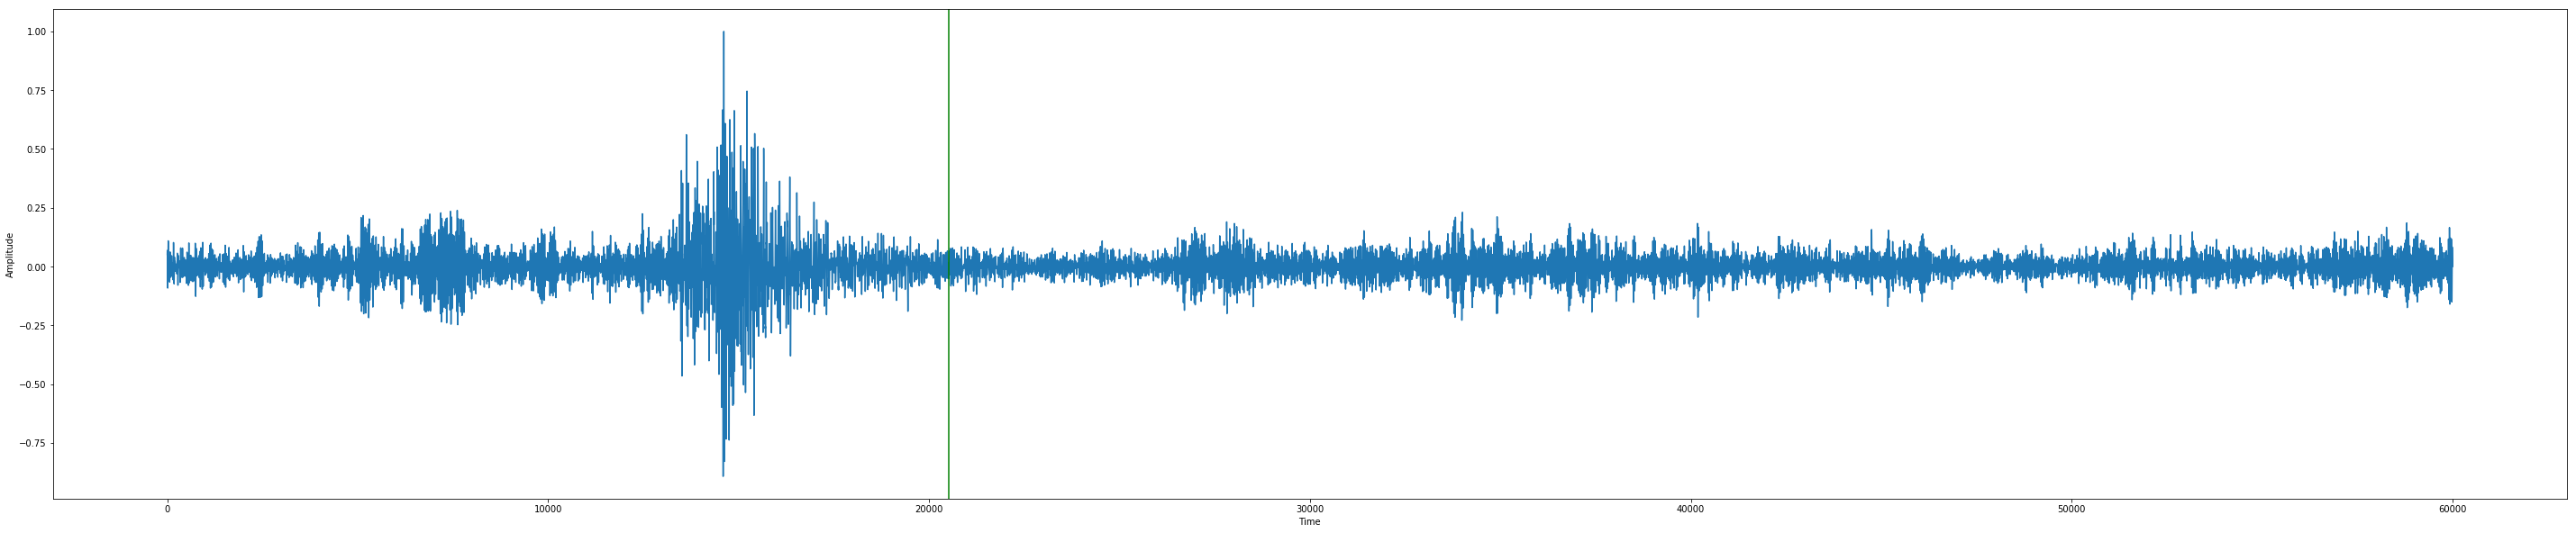

In [155]:
plt.figure(figsize=(50,10))
plt.plot(data)
#plt.axvline(x=picker_p , color='red')
plt.axvline(x=guess , color='green')
plt.xlabel('Time')
plt.ylabel('Amplitude')

#plt.show()
plt.savefig('Test.png')      